# Programming for Data Science

## Linear Models

### Regularization 

#### Amir Hossein Akhavan Rahnama

In this notebook, we showcase the usefulness of regularization using polynomial regression. We are replicating Bishop's example from Chapter 1, in case you would like to follow up reading on the topic. 

The task is to model $y = f(x) + \epsilon$ in which $f(x) = \sin(2\pi x)$ using only 10 samples:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

Make sure to set the random seed for reprodubility:

In [2]:
np.random.seed(0)

In [3]:
def true_fun(X):
    return np.sin(2 * np.pi * X)

In [4]:
n_samples = 10
degrees = [1, 3, 9]
error = np.random.randn(n_samples) * 0.1

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + error

### The case for regularization

When using polynomial features, a user can set the degree of polynomial when modelling a sample from a function. If we don't use any regularization, as we increase the degree of polynomials, we over-fit the sample and miss out on modelling the actual function:

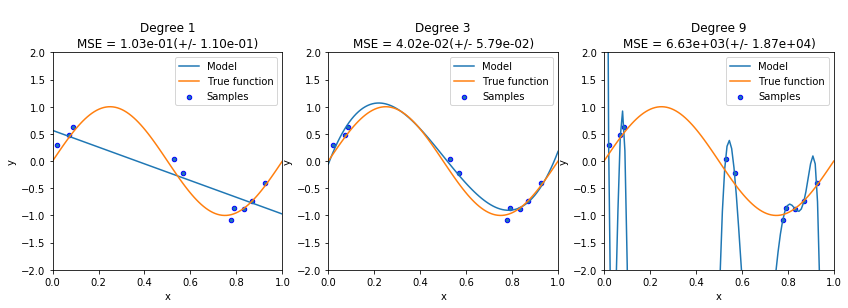

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax = ax.ravel()

for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    ax[i].plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax[i].plot(X_test, true_fun(X_test), label="True function")
    ax[i].scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_xlim((0, 1))
    ax[i].set_ylim((-2, 2))
    ax[i].legend(loc="best")
    ax[i].set_title("\nDegree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

fig.savefig('over_fitting.png', format='png', dpi=600)
plt.show()

Now let us try to model the data using regularization without changing the degree of polynomials with L2 regularization:

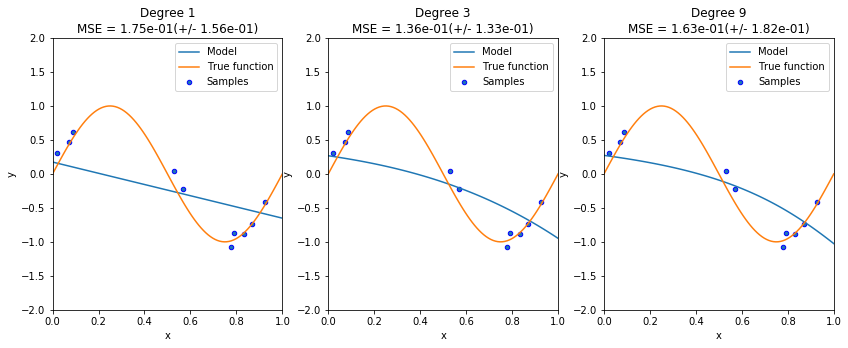

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
ax = ax.ravel()

for i in range(len(degrees)):

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = Ridge()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    ax[i].plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax[i].plot(X_test, true_fun(X_test), label="True function")
    ax[i].scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_xlim((0, 1))
    ax[i].set_ylim((-2, 2))
    ax[i].legend(loc="best")
    ax[i].set_title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
fig.savefig('ridge.png', format='png', dpi=600)
plt.show()

### L1 regularization (LASSO)

Now let us try to model the data using regularization without changing the degree of polynomials with L1 regularization:

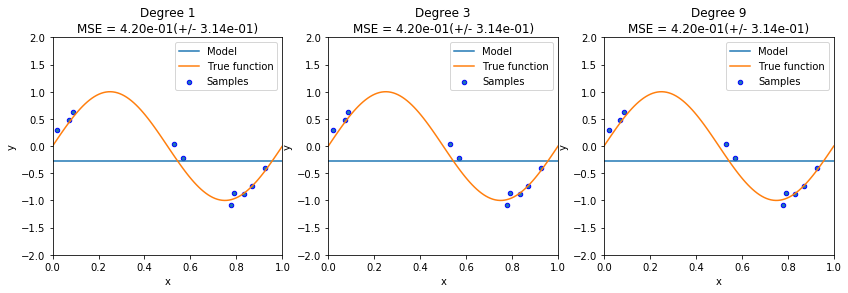

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax = ax.ravel()

for i in range(len(degrees)):
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = Lasso()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    ax[i].plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax[i].plot(X_test, true_fun(X_test), label="True function")
    ax[i].scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_xlim((0, 1))
    ax[i].set_ylim((-2, 2))
    ax[i].legend(loc="best")
    ax[i].set_title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

fig.savefig('lasso.png', format='png', dpi=600)
plt.show()

### Elasticnet regularization (L1 and L2 regularization)

And finally let us mix both and model the data using regularization without changing the degree of polynomials with L1 and L2 regularization at the same time:

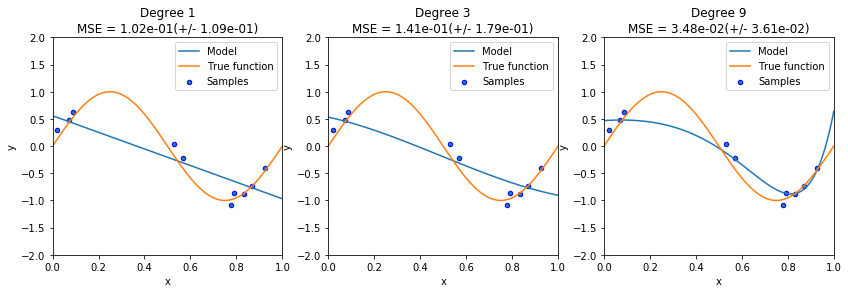

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax = ax.ravel()

for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = ElasticNet(alpha=0.001)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    ax[i].plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax[i].plot(X_test, true_fun(X_test), label="True function")
    ax[i].scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_xlim((0, 1))
    ax[i].set_ylim((-2, 2))
    ax[i].legend(loc="best")
    ax[i].set_title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

fig.savefig('elastic_net.png', format='png', dpi=600)
plt.show()

In almost all cases, overfitting does not happen when using regularization methods. In the case of L1 regularization, the fit model is poor as you increse the value of the degree still. Can you tell why? 